In [1]:
from wordcloud import WordCloud
import re
import unicodedata
import pandas as pd
import nltk
import requests
import os
import json
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer

import matplotlib.pyplot as plt
import seaborn as sns

from env import get_connection
from prepare_nlp import *
from acquire_news_articles import *

In [2]:
df = get_spam_df()

In [3]:
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
more_stopwords = ['r', 'u', '2', 'ltgt']

In [5]:
origional_df = df.copy()

In [6]:
df.text = df.text.apply(basic_clean)

In [7]:
token_df = df.copy()

In [8]:
token_df.text = token_df.text.apply(tokenized)

In [9]:
token_df.head()

,label,text
id,,
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don ' t think he goes to usf he lives ar...


In [10]:
stem_df = token_df.copy()

In [11]:
lemm_df = token_df.copy()

In [12]:
stem_df.text = stem_df.text.apply(stems)

In [13]:
lemm_df['text'] = lemm_df['text'].apply(lemmatized)

In [14]:
stem_no_swords = stem_df.copy()
lemm_no_swords = lemm_df.copy()

In [15]:
stem_no_swords.text = stem_no_swords.text.apply(remove_stopwords, extra_words = more_stopwords)

In [16]:
lemm_no_swords.text = lemm_no_swords.text.apply(remove_stopwords, extra_words = more_stopwords)

### Word Cloud

(-0.5, 399.5, 199.5, -0.5)

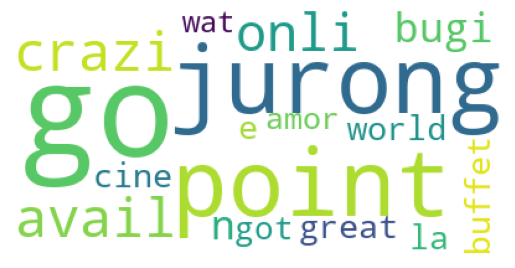

In [17]:
img = WordCloud(background_color='white').generate(stem_no_swords.text[0])
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')

### N_Grams

In [18]:
def ngrams_creator(input_list, n_grams = 2):
    """
    This function takes in a string and returns a list of grams.
    """
    ngrams = nltk.ngrams(input_list, n_grams)
    return list(ngrams)

In [19]:
def panda_grams(df, n_grams=2):
    """
    This function applies the ngrams_creator function to every column in a DataFrame.
    """
    for col in df:
        df[col] = df[col].apply(ngrams_creator, n_grams=n_grams)
    return df

In [20]:
stem_no_swords.text[0]

'go jurong point crazi avail onli bugi n great world la e buffet cine got amor wat'

#### Combining all strings into list of words

In [21]:
stem_ham_words = stem_no_swords[stem_no_swords.label == 'ham'].text

In [22]:
lemm_ham_words = lemm_no_swords[lemm_no_swords.label == 'ham'].text

In [23]:
stem_spam_words = stem_no_swords[stem_no_swords.label == 'spam'].text

In [24]:
lemm_spam_words = lemm_no_swords[lemm_no_swords.label == 'spam'].text

In [25]:
stem_ham_list = []
for row in stem_ham_words:
    stem_ham_list.extend(row.split())

In [26]:
stem_spam_list = []
for row in stem_spam_words:
    stem_spam_list.extend(row.split())

In [27]:
lemm_ham_list = []
for row in lemm_ham_words:
    lemm_ham_list.extend(row.split())

In [28]:
lemm_spam_list = []
for row in lemm_spam_words:
    lemm_spam_list.extend(row.split())

In [29]:
stem_ham_grams = ngrams_creator(stem_ham_list)

In [30]:
stem_spam_grams = ngrams_creator(stem_spam_list)

In [31]:
lemm_ham_grams = ngrams_creator(lemm_ham_list)

In [32]:
lemm_spam_grams = ngrams_creator(lemm_spam_list)

In [33]:
stem_ham_grams[:5]

[('go', 'jurong'),
 ('jurong', 'point'),
 ('point', 'crazi'),
 ('crazi', 'avail'),
 ('avail', 'onli')]

In [34]:
stem_spam_grams[:5]

[('free', 'entri'),
 ('entri', 'wkli'),
 ('wkli', 'comp'),
 ('comp', 'win'),
 ('win', 'fa')]

In [35]:
lemm_ham_grams[:10]

[('go', 'jurong'),
 ('jurong', 'point'),
 ('point', 'crazy'),
 ('crazy', 'available'),
 ('available', 'bugis'),
 ('bugis', 'n'),
 ('n', 'great'),
 ('great', 'world'),
 ('world', 'la'),
 ('la', 'e')]

In [36]:
lemm_spam_grams[:10]

[('free', 'entry'),
 ('entry', 'wkly'),
 ('wkly', 'comp'),
 ('comp', 'win'),
 ('win', 'fa'),
 ('fa', 'cup'),
 ('cup', 'final'),
 ('final', 'tkts'),
 ('tkts', '21st'),
 ('21st', 'may')]

# Create a function for above
- Order of operations matter. Make sure n_grams are created for each string/row, then joined.

## 1. Spam Data

Load the spam data set.
- Done

Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- Word clouds = Bad
- bi_grams = Good

Is there any overlap in the bigrams for the spam data and the ham data?
- I did not see any

Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

The order seems wrong. It is creating n_grams off a list versus individual strings.

In [37]:
lemm_ham_trigrams = ngrams_creator(lemm_ham_list, n_grams = 3)

In [38]:
lemm_spam_trigrams = ngrams_creator(lemm_spam_list, n_grams = 3)

In [39]:
lemm_ham_trigrams[:10]

[('go', 'jurong', 'point'),
 ('jurong', 'point', 'crazy'),
 ('point', 'crazy', 'available'),
 ('crazy', 'available', 'bugis'),
 ('available', 'bugis', 'n'),
 ('bugis', 'n', 'great'),
 ('n', 'great', 'world'),
 ('great', 'world', 'la'),
 ('world', 'la', 'e'),
 ('la', 'e', 'buffet')]

In [40]:
lemm_spam_trigrams[:10]

[('free', 'entry', 'wkly'),
 ('entry', 'wkly', 'comp'),
 ('wkly', 'comp', 'win'),
 ('comp', 'win', 'fa'),
 ('win', 'fa', 'cup'),
 ('fa', 'cup', 'final'),
 ('cup', 'final', 'tkts'),
 ('final', 'tkts', '21st'),
 ('tkts', '21st', 'may'),
 ('21st', 'may', '2005')]

# The order seems wrong. It is creating n_grams off a list versus individual strings.

## 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [41]:
headers = {'User-Agent': 'Codeup Data Science'}

In [42]:
#Scrape blog homepage for links
url = 'https://codeup.com/blog/'

response = get(url, headers=headers)

soup = BeautifulSoup(response.content, 'html.parser')

more_links = soup.find_all('a', class_='more-link')

In [43]:
#Extract the links into something I can use
links_list = [link['href'] for link in more_links]

In [44]:
links_list

['https://codeup.com/codeup-news/panelist-spotlight-4/',
 'https://codeup.com/events/black-excellence-in-tech-panelist-spotlight-stephanie-jones/',
 'https://codeup.com/events/black-excellence-in-tech-panelist-spotlight-james-cooper/',
 'https://codeup.com/events/black-excellence-in-tech-panelist-spotlight/',
 'https://codeup.com/tips-for-prospective-students/coding-bootcamp-or-self-learning/',
 'https://codeup.com/codeup-news/codeup-best-bootcamps/']

In [45]:
codeup_text = get_blog_articles(links_list)

In [46]:
codeup_df = pd.DataFrame(codeup_text)

In [47]:
codeup_df.head()

,title,link,date_published,content
0,Black Excellence in Tech: Panelist Spotlight –...,https://codeup.com/codeup-news/panelist-spotli...,"Feb 16, 2023",\nBlack excellence in tech: Panelist Spotlight...
1,Black excellence in tech: Panelist Spotlight –...,https://codeup.com/events/black-excellence-in-...,"Feb 13, 2023",\nBlack excellence in tech: Panelist Spotlight...
2,Black excellence in tech: Panelist Spotlight –...,https://codeup.com/events/black-excellence-in-...,"Feb 10, 2023",\nBlack excellence in tech: Panelist Spotlight...
3,Black excellence in tech: Panelist Spotlight –...,https://codeup.com/events/black-excellence-in-...,"Feb 6, 2023",\nBlack excellence in tech: Panelist Spotlight...
4,Coding Bootcamp or Self-Learning? Which is Bes...,https://codeup.com/tips-for-prospective-studen...,"Jan 20, 2023",\nIf you’re interested in embarking on a caree...


In [48]:
codeup_df['content'] = codeup_df['content'].apply(basic_clean)

In [49]:
codeup_df['content'] = codeup_df['content'].apply(tokenized)

In [50]:
codeup_df['content'] = codeup_df['content'].apply(lemmatized)

In [51]:
codeup_df['content'] = codeup_df['content'].apply(remove_stopwords)

In [52]:
codeup_df['content'] = codeup_df['content'].str.split()

In [53]:
codeup_df['content'].apply(ngrams_creator)

0    [(black, excellence), (excellence, tech), (tec...
1    [(black, excellence), (excellence, tech), (tec...
2    [(black, excellence), (excellence, tech), (tec...
3    [(black, excellence), (excellence, tech), (tec...
4    [(youre, interested), (interested, embarking),...
5    [(codeup, pleased), (pleased, announce), (anno...
Name: content, dtype: object

In [54]:
n_gram_list = []
for row in codeup_df['content'].apply(ngrams_creator):
    n_gram_list.extend(row)

In [55]:
n_gram_series = pd.Series(n_gram_list)

In [56]:
n_gram_series.value_counts().head(10)

(black, excellence)      9
(coding, bootcamps)      9
(excellence, tech)       9
(course, report)         5
(tech, industry)         5
(tech, panel)            5
(experience, black)      4
(panelist, leading)      4
(leading, discussion)    4
(discussion, learn)      4
dtype: int64

In [57]:
tri_gram_list = []
for row in codeup_df['content'].apply(ngrams_creator, n_grams=3):
    tri_gram_list.extend(row)

In [58]:
tri_gram_list = pd.Series(tri_gram_list)

In [59]:
tri_gram_list.value_counts().head(10)

(black, excellence, tech)          9
(excellence, tech, panel)          5
(2023, celebrate, wed)             4
(wed, like, spotlight)             4
(like, spotlight, panelist)        4
(spotlight, panelist, leading)     4
(panelist, leading, discussion)    4
(leading, discussion, learn)       4
(discussion, learn, bit)           4
(learn, bit, respective)           4
dtype: int64

## 3.Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [60]:
topic = ['business', 'sports' , 'technology', 'entertainment']

In [61]:
articles = get_news_articles(topic) #Doesn't take list if json is in the same folder.

In [62]:
articles = pd.DataFrame(articles)

In [63]:
articles.head()

,category,title,content
0,business,Sachin Tendulkar and his wife meet Bill Gates;...,Former cricketer Sachin Tendulkar and his wife...
1,business,"'Best wishes to my classmate,' writes Gates in...",Businessman Anand Mahindra on Tuesday met Micr...
2,business,Ambanis should get Z+ security cover across In...,The Supreme Court on Tuesday stated that the Z...
3,business,People consuming 30 GB and paying almost nothi...,Bharti Airtel is looking to raise mobile phone...
4,business,India's GDP growth slows down to 4.4% in Oct-D...,India's GDP growth rate fell for the second co...


In [64]:
articles['content'] = articles['content'].apply(basic_clean)

In [65]:
articles['content'] = articles['content'].apply(tokenized)

In [66]:
articles['content'] = articles['content'].apply(lemmatized)

In [67]:
articles['content'] = articles['content'].apply(remove_stopwords)

In [68]:
articles['content'] = articles['content'].str.split()

In [69]:
art_n_gram_list = []
for row in articles['content'].apply(ngrams_creator):
    art_n_gram_list.extend(row)

In [70]:
art_n_gram_series = pd.Series(art_n_gram_list)

In [71]:
art_n_gram_series.value_counts().head(10)

(india, ')                 7
(', ')                     7
(sachin, tendulkar)        5
(green, hydrogen)          5
(steve, smith)             4
(film, ')                  4
(supplier, foxlink)        4
(manufacturing, sector)    4
(data, showed)             4
(andhra, pradesh)          4
dtype: int64

In [72]:
topic = ['business', 'sports' , 'technology', 'entertainment']

In [73]:
tech_articles = articles[articles.category == 'technology']

In [74]:
tech_list = []
for row in tech_articles['content'].apply(ngrams_creator):
    tech_list.extend(row)

In [75]:
tech_series = pd.Series(tech_list)

In [76]:
biz_articles = articles[articles.category == 'business']

In [77]:
biz_list = []
for row in biz_articles['content'].apply(ngrams_creator):
    biz_list.extend(row)

In [78]:
biz_series = pd.Series(biz_list)

In [79]:
ent_articles = articles[articles.category == 'entertainment']

In [80]:
ent_list = []
for row in ent_articles['content'].apply(ngrams_creator):
    ent_list.extend(row)

In [87]:
ent_series = pd.Series(biz_list)

In [82]:
sport_articles = articles[articles.category == 'sports']

In [83]:
sport_list = []
for row in sport_articles['content'].apply(ngrams_creator):
    sport_list.extend(row)

In [84]:
sport_series = pd.Series(sport_list)

In [85]:
tech_series.head()

0      (pm, narendra)
1    (narendra, modi)
2     (modi, tuesday)
3    (tuesday, asked)
4       (asked, tech)
dtype: object

In [88]:
ent_series.head()

0    (former, cricketer)
1    (cricketer, sachin)
2    (sachin, tendulkar)
3      (tendulkar, wife)
4         (wife, anjali)
dtype: object

In [89]:
biz_series.head()

0    (former, cricketer)
1    (cricketer, sachin)
2    (sachin, tendulkar)
3      (tendulkar, wife)
4         (wife, anjali)
dtype: object

In [90]:
sport_series.head()

0     (portugal, forward)
1    (forward, cristiano)
2    (cristiano, ronaldo)
3    (ronaldo, abstained)
4     (abstained, voting)
dtype: object